<a href="https://colab.research.google.com/github/AliHina804/CognoRise-Infotech/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data shape: (70000, 784)
Target shape: (70000,)


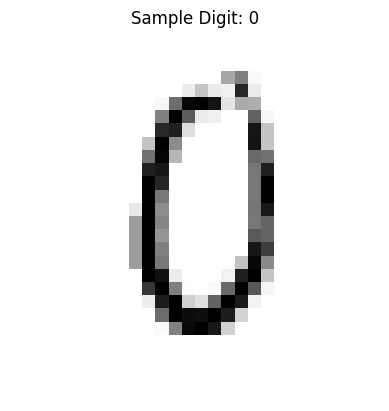

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 0.8119 - loss: 0.5784 - val_accuracy: 0.9767 - val_loss: 0.0755
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9640 - loss: 0.1207 - val_accuracy: 0.9802 - val_loss: 0.0641
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9728 - loss: 0.0895 - val_accuracy: 0.9847 - val_loss: 0.0477
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9795 - loss: 0.0690 - val_accuracy: 0.9876 - val_loss: 0.0407
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9796 - loss: 0.0653 - val_accuracy: 0.9886 - val_loss: 0.0349
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.9829 - loss: 0.0533 - val_accuracy: 0.9909 - val_loss: 0.0312
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.9848 - loss: 0.0510 - val_accuracy: 0.9905 - val_loss: 0.0303
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 51s 58ms/step - accuracy: 0.9856 - loss: 0.0473 - 

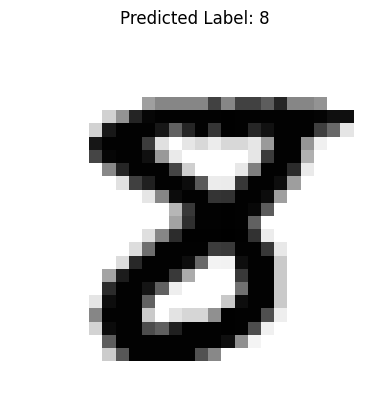

In [3]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')

print("Data shape:", mnist.data.shape)  # (70000, 784)
print("Target shape:", mnist.target.shape)

X, y = mnist["data"], mnist["target"]

some_digit = X.iloc[232]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.title(f"Sample Digit: {y[232]}")
plt.show()

X = X / 255.0
X = X.values.reshape(-1, 28, 28, 1)
y = y.astype(int)
y = to_categorical(y, 10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

some_test_digit = X_val[0].reshape(1, 28, 28, 1)
predicted_label = np.argmax(model.predict(some_test_digit))
print(f"Predicted Label: {predicted_label}")

plt.imshow(X_val[0].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.title(f"Predicted Label: {predicted_label}")
plt.show()
